In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

torch.manual_seed(1)

In [ ]:
x = torch.randn(100, 1) * 10
y = x + torch.randn(100, 1) * 3
plt.plot(x.numpy(), y.numpy(), "o")
plt.ylabel("y")
plt.xlabel("x")

In [ ]:
class LR(nn.Module):
    def __init__(self, input_size, output_size, learning_rate=None):
        if learning_rate is None:
            self.learning_rate = 1 / 100
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [ ]:
model = LR(1, 1)

In [ ]:
[w, b] = model.parameters()


def getparams():
    return (w[0, 0].item(), b[0].item())

In [ ]:
def plot_fit(title):
    plt.title = title
    w1, b1 = getparams()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, "r")
    plt.scatter(x, y)
    plt.show()

In [ ]:
plot_fit("Inital Model")

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [25]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 9.981285095214844
epoch: 1 loss: 9.981280326843262
epoch: 2 loss: 9.981276512145996
epoch: 3 loss: 9.98127269744873
epoch: 4 loss: 9.981269836425781
epoch: 5 loss: 9.981266021728516
epoch: 6 loss: 9.98126220703125
epoch: 7 loss: 9.9812593460083
epoch: 8 loss: 9.981255531311035
epoch: 9 loss: 9.98125171661377
epoch: 10 loss: 9.981249809265137
epoch: 11 loss: 9.981246948242188
epoch: 12 loss: 9.981245040893555
epoch: 13 loss: 9.981241226196289
epoch: 14 loss: 9.98123836517334
epoch: 15 loss: 9.981237411499023
epoch: 16 loss: 9.98123550415039
epoch: 17 loss: 9.981232643127441
epoch: 18 loss: 9.981229782104492
epoch: 19 loss: 9.98122787475586
epoch: 20 loss: 9.981225967407227
epoch: 21 loss: 9.981224060058594
epoch: 22 loss: 9.981222152709961
epoch: 23 loss: 9.981220245361328
epoch: 24 loss: 9.981219291687012
epoch: 25 loss: 9.981217384338379
epoch: 26 loss: 9.981215476989746
epoch: 27 loss: 9.98121452331543
epoch: 28 loss: 9.981213569641113
epoch: 29 loss: 9.981212615966797

Text(0.5, 0, 'Epoc')

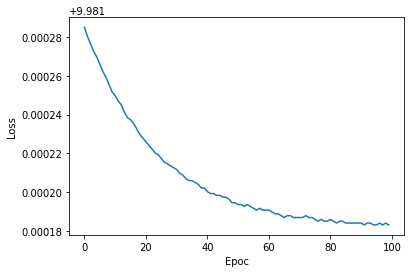

In [31]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoc")

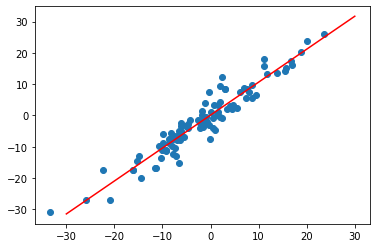

In [26]:
plot_fit("Trained Model")